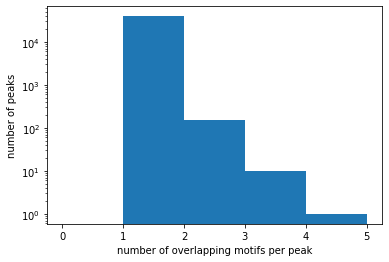

In [4]:

import bioframe
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


ctcf_peaks = bioframe.read_table(r'~/Downloads/ENCFF393REY.bed.gz', schema = 'narrowPeak')
ctcf_peaks[0:100]


jaspar_url = 'http://expdata.cmmt.ubc.ca/JASPAR/downloads/UCSC_tracks/2022/hg38/'
jaspar_motif_file = 'MA0139.1.tsv.gz'
ctcf_motifs = bioframe.read_table(jaspar_url+jaspar_motif_file,schema='jaspar',skiprows=1)    
ctcf_motifs[0:4]

df_peaks_motifs = bioframe.overlap(ctcf_peaks,ctcf_motifs, suffixes=('_1','_2'))

motifs_per_peak = df_peaks_motifs.groupby(["chrom_1", "start_1","end_1"]).size().values
plt.hist(motifs_per_peak,np.arange(0,np.max(motifs_per_peak)))
plt.xlabel('number of overlapping motifs per peak')
plt.ylabel('number of peaks')
plt.semilogy();


In [10]:
motifs_per_peak.shape, df_peaks_motifs.shape

((39577,), (39756, 17))

In [8]:
df_peaks_motifs[0:5]

,chrom_1,start_1,end_1,name_1,score_1,strand_1,fc_1,-log10p_1,-log10q_1,relSummit_1,chrom_2,start_2,end_2,name_2,score_2,pval_2,strand_2
0,chr4,107164058,107164381,.,542.0,.,572.84135,-1.0,4.7294,177.0,None,<NA>,<NA>,None,NaN,NaN,None
1,chr17,37203637,37203963,.,586.0,.,569.68704,-1.0,4.7294,155.0,None,<NA>,<NA>,None,NaN,NaN,None
2,chr9,21313331,21313630,.,736.0,.,559.65096,-1.0,4.7294,148.0,None,<NA>,<NA>,None,NaN,NaN,None
3,chr6,35379928,35380233,.,762.0,.,558.30330,-1.0,4.7294,151.0,None,<NA>,<NA>,None,NaN,NaN,None
4,chr11,100295357,100295688,.,935.0,.,553.33011,-1.0,4.7294,175.0,None,<NA>,<NA>,None,NaN,NaN,None


In [17]:
np.sum(pd.isna(df_peaks_motifs['chrom_2'].values)) #- len(df_peaks_motifs)

37612

In [18]:
ctcf_peaks.shape

(39586, 10)

In [26]:
? bioframe.count_overlaps

In [20]:
counts = bioframe.count_overlaps(ctcf_peaks, ctcf_motifs)

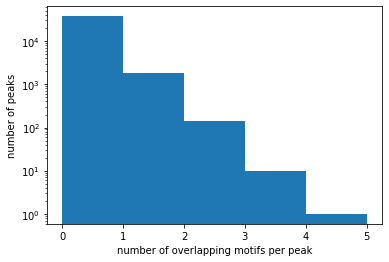

In [27]:
plt.hist(counts['count'].values,np.arange(0,np.max(motifs_per_peak)))
plt.xlabel('number of overlapping motifs per peak')
plt.ylabel('number of peaks')
plt.semilogy();


In [23]:
import sys
sys.executable

'/Users/vbchavali/opt/anaconda3/bin/python'

In [25]:
bioframe

<module 'bioframe' from '/Users/vbchavali/opt/anaconda3/lib/python3.8/site-packages/bioframe/__init__.py'>